In [254]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [1]:
!ls "/home/pdpino/workspace-medical-ai/report_generation/nlp-chex-gold-sentences"

cxr-sentence-assessment-expert1.csv  iu-empty.csv     mimic-expert1.csv
cxr-sentence-assessment-expert2.csv  iu-sorted.txt    mimic-expert2.csv
docfreq-mimic.data		     mimic-empty.csv  mimic-sorted.txt


In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("/home/pdpino/workspace-medical-ai/report_generation/nlp-chex-gold-sentences/cxr-sentence-assessment-expert1.csv")

In [11]:
df

,Sentence,Atelectasis,Cardiomegaly,Consolidation,Edema,Lung Opacity,Pleural Effusion,Any other finding,Not understood or malformed
0,band of atelectasis crossing the left hilus ha...,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
1,right pleural effusion with bibasilar atelecta...,Abnormal,NaN,NaN,NaN,NaN,Abnormal,NaN,False
2,atelectasis at both lung bases are present .,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
3,in addition to severe bibasilar atelectasis an...,Abnormal,NaN,Abnormal,NaN,NaN,Abnormal,NaN,False
4,increase of the pre existing retrocardiac atel...,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
1160,"there is no pneumothorax , appreciable pleural...",NaN,NaN,NaN,NaN,NaN,Normal,Normal,False
1161,continued substantial enlargement of the cardi...,NaN,Abnormal,NaN,NaN,NaN,Normal,Normal,False
1162,there is no vascular congestion or pleural eff...,NaN,NaN,NaN,NaN,NaN,Normal,Normal,False
1163,almost complete resolution of left pleural eff...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,False


In [17]:
df['Atelectasis'].fillna(-2)

0       Abnormal
1       Abnormal
2       Abnormal
3       Abnormal
4       Abnormal
          ...   
1160          -2
1161          -2
1162          -2
1163          -2
1164          -2
Name: Atelectasis, Length: 1165, dtype: object

In [36]:
import numpy as np

df['Sentence'].values

array(['band of atelectasis crossing the left hilus has been present for several days .',
       'right pleural effusion with bibasilar atelectasis and expected postoperative changes .',
       'atelectasis at both lung bases are present .', ...,
       'there is no vascular congestion or pleural effusion .',
       'almost complete resolution of left pleural effusion .',
       'both lungs are clear with no focal consolidation , or pleural effusion .'],
      dtype=object)

In [19]:
df.columns

Index(['Sentence', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Lung Opacity', 'Pleural Effusion', 'Any other finding',
       'Not understood or malformed'],
      dtype='object')

In [17]:
df2 = pd.read_csv("/home/pdpino/workspace-medical-ai/report_generation/nlp-chex-gold-sentences/cxr-sentence-assessment-expert2.csv")

In [18]:
df2

,Sentence,Atelectasis,Cardiomegaly,Consolidation,Edema,Lung Opacity,Pleural Effusion,Any other finding,Not understood or malformed
0,band of atelectasis crossing the left hilus ha...,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
1,right pleural effusion with bibasilar atelecta...,Abnormal,NaN,NaN,NaN,NaN,Abnormal,NaN,False
2,atelectasis at both lung bases are present .,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
3,in addition to severe bibasilar atelectasis an...,Abnormal,NaN,Abnormal,NaN,NaN,Abnormal,NaN,False
4,increase of the pre existing retrocardiac atel...,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
1160,"there is no pneumothorax , appreciable pleural...",Normal,NaN,NaN,NaN,NaN,Normal,Normal,False
1161,continued substantial enlargement of the cardi...,NaN,Abnormal,NaN,NaN,NaN,Normal,Normal,False
1162,there is no vascular congestion or pleural eff...,NaN,NaN,NaN,NaN,NaN,Normal,Normal,False
1163,almost complete resolution of left pleural eff...,NaN,NaN,NaN,NaN,NaN,Abnormal,NaN,False


In [7]:
df.columns

Index(['Sentence', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Lung Opacity', 'Pleural Effusion', 'Any other finding',
       'Not understood or malformed'],
      dtype='object')

In [16]:
df[df['Any other finding'] == 'Abnormal']['Sentence'].tolist()

['low lung volumes with atelectasis at the right lung bases .',
 'because this patient emphysema is so severe , it may be important to document the extent of atelectasis and pleural effusion , both of which can be treated .',
 'otherwise , there is little overall change with some residual atelectasis at the bases and subcutaneous gas along the right lateral chest wall .',
 'continued bibasilar opacification with atelectatic changes , more prominent on the left , where there is also retrocardiac opacification consistent with volume loss in the lower lobe .',
 'interval increase in right pleural effusion with complete atelectasis of the right middle and lower lobes , raising concern for bronchial obstruction .',
 'lung volumes remain extremely low , exaggerating what is probably mild pulmonary edema on the right and persistent left lower lobe atelectasis .',
 'low lung volumes with atelectasis and prominent hila .',
 'left sided loculated hydropneumothorax with compressive atelectasis .'

In [5]:
df2 = pd.read_csv("/home/pdpino/workspace-medical-ai/report_generation/nlp-chex-gold-sentences/mimic-expert1.csv")

In [13]:
df2

,sentence,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Lung Opacity
0,band of atelectasis crossing the left hilus ha...,1,-2,-2,-2,-2,-2
1,right pleural effusion with bibasilar atelecta...,1,-2,-2,-2,1,-2
2,atelectasis at both lung bases are present .,1,-2,-2,-2,-2,-2
3,in addition to severe bibasilar atelectasis an...,1,-2,1,-2,1,-2
4,increase of the pre existing retrocardiac atel...,1,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...
1147,"there is no pneumothorax , appreciable pleural...",-2,-2,-2,-2,0,-2
1148,continued substantial enlargement of the cardi...,-2,1,-2,-2,0,-2
1149,there is no vascular congestion or pleural eff...,-2,-2,-2,-2,0,-2
1150,almost complete resolution of left pleural eff...,-2,-2,-2,-2,0,-2


In [ ]:
df['Ate']

In [7]:
import numpy as np
np.array(['asdfasd', 'sfasdf', ])

array(['asdfasd', 'sfasdf', 'nan'], dtype='<U32')

## Fact Embedding (BiomedVLP CXR-BERT specialized fine-tuned)

In [138]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: cxr_bert
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_100_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)=0.9559.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_lo

In [230]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/
   top_k: 500
   save_embeddings: True
len(sentences): 1165
len(labels): 1165
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_57_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9533.pt', 'checkpoint_60_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9

In [255]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "biovil-t" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/
   top_k: 500
   save_embeddings: True
len(sentences): 1165
len(labels): 1165
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_298_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9518.pt', 'checkpoint_410_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9546.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaG

In [2]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
len(sentences): 1165
len(labels): 1165
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_92_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9587.pt', 'checkpoint_129_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)

## BiomedVLP CXR-BERT specialized

In [161]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "cxr-bert-specialized" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 12/12 [00:03<00:00,  3.98it/s]
Embeddings shape: (1165, 128)
100%|██████████████████████████████████████| 1165/1165 [00:11<00:00, 100.04it/s]
Saving embeddings to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_152

## BiomedVLP-BioViL-T

In [162]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "biovil-t" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 12/12 [00:01<00:00,  6.09it/s]
Embeddings shape: (1165, 128)
100%|███████████████████████████████████████| 1165/1165 [00:12<00:00, 96.54it/s]
Saving embeddings to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_152228_mimiccxr_rad_annotations_biovil-t/embeddings(mimiccxr_rad_annotations).pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_152228_mimiccxr_rad_annotations_biovil-t/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl


## Oracle

In [140]:
!python ../eval_fact_embedding.py \
--evaluation_mode "mimiccxr_radiologist_annotations" \
--method "oracle" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: mimiccxr_radiologist_annotations
   method: oracle
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
100%|███████████████████████████████████████| 1165/1165 [00:12<00:00, 94.35it/s]
Saving labels to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230802_093204_mimiccxr_rad_annotations_oracle/labels.pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230802_093204_mimiccxr_rad_annotations_oracle/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl


In [51]:
from importlib import reload
import medvqa

In [57]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

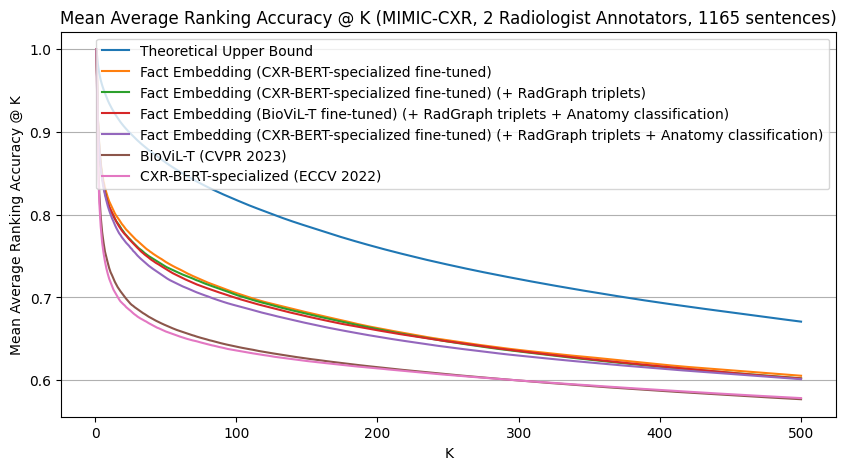

In [3]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metric_lists

metric_paths = [
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_152109_mimiccxr_rad_annotations_cxr-bert-specialized/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_152228_mimiccxr_rad_annotations_biovil-t/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230802_093204_mimiccxr_rad_annotations_oracle/mean_average_accuracy_up_to_500(mimiccxr_rad_annotations).pkl',
]
metric_lists = [load_pickle(x) for x in metric_paths]
method_names = [
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets)',
    'Fact Embedding (BioViL-T fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Theoretical Upper Bound',
]
plot_metric_lists(
    metric_lists=metric_lists,
    method_names=method_names,
    title="Mean Average Ranking Accuracy @ K (MIMIC-CXR, 2 Radiologist Annotators, 1165 sentences)",
    metric_name='Mean Average Ranking Accuracy @ K',
    xlabel="K",
    figsize=(10, 5),
)

In [60]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings.pkl')

In [19]:
from medvqa.utils.logging import print_bold
import numpy as np
import random
from medvqa.utils.math import rank_vectors_by_dot_product

def jaccard(s1, s2):
    ints_len = len(s1 & s2)
    return ints_len / (len(s1) + len(s2) - ints_len)

def rank_sentences(embeddings_list, method_names, labels, metric='acc', top_k=20, qi=None):
    assert len(embeddings_list) == len(method_names)
    assert metric in ('acc', 'jaccard')
    n = len(embeddings_list[0]['sentences'])
    if qi is None:
        qi = random.randint(0, n-1)
    print('qi =', qi)
    for i, tmp in enumerate(embeddings_list):
        print('-------------')
        print(method_names[i])
        q = tmp['sentences'][qi]
        print_bold("Query:", q)
        if 'embeddings' in tmp:
            idxs = rank_vectors_by_dot_product(tmp['embeddings'], tmp['embeddings'][qi])
        else:
            if metric == 'acc':
                idxs = np.argsort(np.mean(tmp['labels'] == tmp['labels'][qi], axis=1))[::-1]
            elif metric == 'jaccard':
                idxs = np.argsort([jaccard(tmp['labels'][j], tmp['labels'][qi]) for j in range(n)])[::-1]
            else: assert False
        for j in range(top_k):            
            print('****', tmp['sentences'][idxs[j]])
            if metric == 'acc':
                print(f'Acc: {np.mean(labels[qi] == labels[idxs[j]]):.2f}')
            elif metric == 'jaccard':
                print(f'Jaccard: {jaccard(labels[qi], labels[idxs[j]]):.2f}')
            else: assert False

In [144]:
embeddings_list = [
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230802_092426_mimiccxr_rad_annotations_cxr_bert/embeddings(mimiccxr_rad_annotations).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings(mimiccxr_rad_annotations).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230802_093204_mimiccxr_rad_annotations_oracle/labels.pkl'),
]
method_names = [
    'CXR-BERT',
    'Fact Embedding (CXR-BERT fine-tuned)',
    'Theoretical Upper Bound',
]

In [150]:
rank_sentences(embeddings_list, method_names, embeddings_list[-1]['labels'])

qi = 329
-------------
CXR-BERT
Query: there is also vascular enlargement , consistent with pulmonary edema .
**** there is also vascular enlargement , consistent with pulmonary edema .
Acc: 1.00
**** cardiomediastinal silhouette is unchanged , but there is interval progression of interstitial pulmonary edema .
Acc: 0.79
**** cardiac silhouette is at the upper limits of normal in size and there is moderate pulmonary vascular congestion that may be slightly increasing .
Acc: 0.64
**** overall , the findings are suggesting mild to moderate pulmonary edema .
Acc: 0.86
**** chf with pulmonary edema .
Acc: 0.93
**** heart size and mediastinum are unchanged but there is interval development of vascular enlargement in interstitial opacities consistent with interval development of pulmonary edema .
Acc: 0.71
**** marked cardiomegaly is accompanied by development of bilateral perihilar airspace opacities suggestive of pulmonary edema .
Acc: 0.57
**** bilateral increased interstitial opacities c

In [165]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "cxr-bert-specialized" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 87/87 [00:03<00:00, 23.85it/s]
Embeddings shape: (8617, 128)
100%|███████████████████████████████████████| 861

In [166]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "biovil-t" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 87/87 [00:03<00:00, 24.23it/s]
Embeddings shape: (8617, 128)
100%|███████████████████████████████████████| 8617/8617 [01:46<00:00, 80.96it/s]
Saving embeddings to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_153222_iuxray_chexpert_labeler_biovil-t/embeddings(iuxray_chexpert_labeler).pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20

In [124]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: cxr_bert
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_100_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)=0.9559.pt']
Loading model weig

In [232]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_57_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)

In [257]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "biovil-t" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: biovil-t
   device: GPU
   batch_size: 32
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_298_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9518.pt', 'checkpoint_410_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9546.pt']
Loading model weights from /mnt

In [7]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_92_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+t

In [125]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexpert_labeler" \
--method "oracle" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexpert_labeler
   method: oracle
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexpert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexpert_labels.pkl
100%|██████████████████████████████████████| 8617/8617 [01:08<00:00, 125.80it/s]
Saving labels to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230801_222333_iuxray_chexpert_labeler_oracle/labels.pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230801_222333_iuxray_chexpert_labeler_oracle/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl


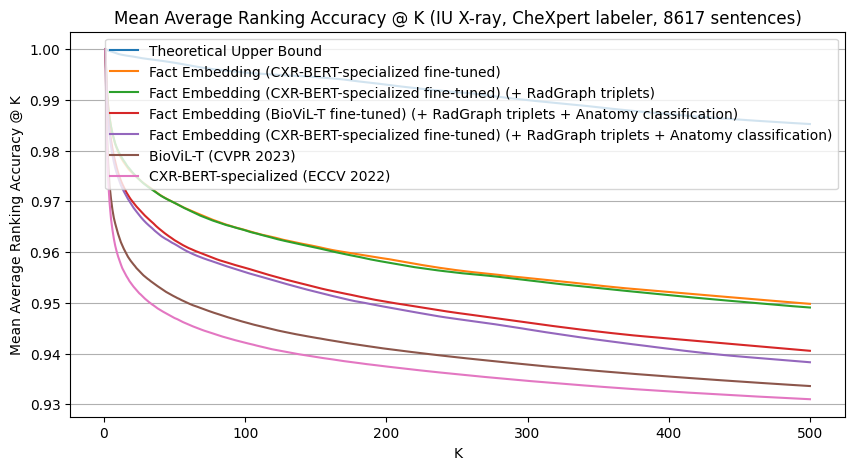

In [8]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metric_lists

metric_paths = [
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_153021_iuxray_chexpert_labeler_cxr-bert-specialized/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_153222_iuxray_chexpert_labeler_biovil-t/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230801_222333_iuxray_chexpert_labeler_oracle/mean_average_accuracy_up_to_500(iuxray_chexpert_labeler).pkl'
]
metric_lists = [load_pickle(x) for x in metric_paths]
method_names = [
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets)',
    'Fact Embedding (BioViL-T fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Theoretical Upper Bound',
]
plot_metric_lists(
    metric_lists=metric_lists,
    method_names=method_names,
    title="Mean Average Ranking Accuracy @ K (IU X-ray, CheXpert labeler, 8617 sentences)",
    metric_name='Mean Average Ranking Accuracy @ K',
    xlabel="K",
    figsize=(10, 5),
)

In [168]:
embeddings_list_2 = [
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings(iuxray_chexpert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_153021_iuxray_chexpert_labeler_cxr-bert-specialized/embeddings(iuxray_chexpert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230803_153222_iuxray_chexpert_labeler_biovil-t/embeddings(iuxray_chexpert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230801_222333_iuxray_chexpert_labeler_oracle/labels.pkl'),
]
method_names_2 = [
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'CXR-BERT-specialized',
    'BioViL-T',
    'Theoretical Upper Bound',
]

In [169]:
rank_sentences(embeddings_list_2, method_names_2, embeddings_list_2[-1]['labels'])

qi = 6792
-------------
Fact Embedding (CXR-BERT-specialized fine-tuned)
Query: Minimal residual opacities remain which may represent small areas of scarring.
**** Minimal residual opacities remain which may represent small areas of scarring.
Acc: 1.00
**** There are biapical opacities, possibly scarring.
Acc: 1.00
**** There are mild right apical opacities, XXXX scarring.
Acc: 1.00
**** Stable biapical opacities, possibly scarring.
Acc: 1.00
**** Streaky left basilar opacities are favored to represent scarring.
Acc: 1.00
**** Some continued right lung opacities are present which may represent areas of scarring.
Acc: 1.00
**** Biapical opacities, XXXX scarring.
Acc: 1.00
**** Minimal residuals from opacities remaining most XXXX represent small areas of scarring.
Acc: 1.00
**** Right apical opacities; the appearance XXXX scarring.
Acc: 1.00
**** There are XXXX biapical opacities, XXXX scarring.
Acc: 1.00
**** Opacity in the right lung base also appears unchanged, XXXX scarring.
Acc: 1.0

In [173]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "cxr-bert-specialized" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray reports from /mnt/workspace/iu-x-ray/dataset/reports/reports.min.json
Number of sentences: 8617
Shortest sentence: KUB.
Longest sentence: The infrahilar pulmonary markings appear slightly prominent bilaterally, which XXXX represents XXXX appearance for the patient but difficult to completely exclude some reactive airway/bronchitic changes in the absence of comparison radiographs.. No airspace consolidation or lobar atelectasis.
Loading CheXbert labeler
(*) Chexbert: labeling 8617 texts ...
Chexbert: 8617 texts not found in cache, invoking chexbert labeler ...
100%|███████████████████████████████████████| 8617/8617 [01:36<00:00, 89.12it/s]
Cache successfully updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexbert_labeler_ca

In [175]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "biovil-t" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 87/87 [00:03<00:00, 24.32it/s]
Embeddings shape: (8617, 128)
100%|███████████████████████████████████████| 8617/8617 [01:53<00:00, 76.11it/s]
Saving embeddings to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194003_iuxray_chexbert_labeler_biovil-t/embeddings(iuxray_chexbert_labeler).pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20

In [176]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_100_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)=0.9559.pt']
Loadin

In [234]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_57_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)

In [259]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "biovil-t" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_298_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9518.pt', 'checkpoint_410_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9546.pt']
Loading model weights from /mn

In [9]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_92_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+t

In [177]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_chexbert_labeler" \
--method "oracle" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_chexbert_labeler
   method: oracle
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and chexbert labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_chexbert_labels.pkl
100%|██████████████████████████████████████| 8617/8617 [01:08<00:00, 126.55it/s]
Saving labels to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194335_iuxray_chexbert_labeler_oracle/labels.pkl
Saving mean average accuracy up to 500 to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194335_iuxray_chexbert_labeler_oracle/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl


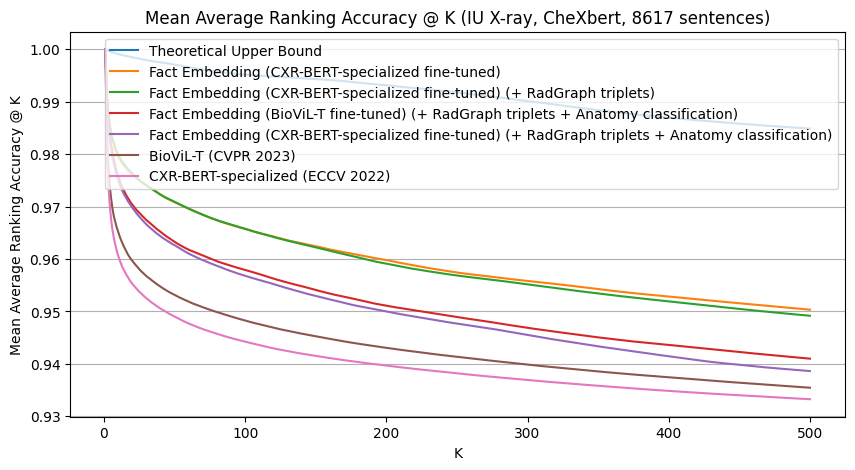

In [10]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metric_lists

metric_paths = [
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_193515_iuxray_chexbert_labeler_cxr-bert-specialized/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194003_iuxray_chexbert_labeler_biovil-t/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194335_iuxray_chexbert_labeler_oracle/mean_average_accuracy_up_to_500(iuxray_chexbert_labeler).pkl'
]
metric_lists = [load_pickle(x) for x in metric_paths]
method_names = [
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets)',
    'Fact Embedding (BioViL-T fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Theoretical Upper Bound',
]
plot_metric_lists(
    metric_lists=metric_lists,
    method_names=method_names,
    title="Mean Average Ranking Accuracy @ K (IU X-ray, CheXbert, 8617 sentences)",
    metric_name='Mean Average Ranking Accuracy @ K',
    xlabel="K",
    figsize=(10, 5),
)

In [179]:
embeddings_list_3 = [
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_193515_iuxray_chexbert_labeler_cxr-bert-specialized/embeddings(iuxray_chexbert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194003_iuxray_chexbert_labeler_biovil-t/embeddings(iuxray_chexbert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings(iuxray_chexbert_labeler).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230804_194335_iuxray_chexbert_labeler_oracle/labels.pkl'),
]
method_names_3 = [
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Theoretical Upper Bound',
]

In [183]:
rank_sentences(embeddings_list_3, method_names_3, embeddings_list_3[-1]['labels'])

qi = 88
-------------
CXR-BERT-specialized (ECCV 2022)
Query: No adenopathy.
**** No adenopathy.
Acc: 1.00
**** No lymphadenopathy.
Acc: 1.00
**** No hilar lymphadenopathy.
Acc: 1.00
**** No obvious mediastinal lymphadenopathy is appreciated.
Acc: 1.00
**** The lungs are free of active disease.
Acc: 1.00
**** No adenopathy or effusion.
Acc: 1.00
**** No active pulmonary disease.
Acc: 1.00
**** No XXXX of active tuberculosis.
Acc: 1.00
**** No active or acute cardiopulmonary disease.
Acc: 1.00
**** No active tuberculosis.
Acc: 1.00
**** No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.
Acc: 1.00
**** No active infectious/tuberculous process.
Acc: 0.93
**** There is no acute osseous abnormality.
Acc: 1.00
**** The bony structures show no acute abnormalities.
Acc: 1.00
**** Specifically, no radiographic evidence for tuberculosis.
Acc: 1.00
**** No acute or active cardiac, pulmonary or pleural disease.
Acc: 1.00
**** No osseous abnormalities.
Acc: 1.00
**** No ev

In [204]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "cxr-bert-specialized" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 87/87 [00:03<00:00, 23.37it/s]
Embeddings shape: (8617, 128)
100%|█████

In [205]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "biovil-t" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████| 87/87 [00:03<00:00, 23.13it/s]
Embeddings shape: (8617, 128)
100%|██████████████████████████████████████| 8617/8617 [00:46<00:00, 184.35it/s]
Saving embeddings to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202054_iuxray_radgraph_biovil-t/embeddings(iuxray_radgraph).pkl
Saving metrics to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/202

In [206]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_100_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)

In [236]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_57_cacc+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)

In [261]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "biovil-t" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: biovil-t
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_298_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9518.pt', 'checkpoint_410_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9546.pt']
Loading model weights from /mn

In [11]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: cxr-bert-specialized
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_92_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+t

In [208]:
!python ../eval_fact_embedding.py \
--evaluation_mode "iuxray_radgraph_labeler" \
--method "oracle" \
--batch_size 100 \
--top_k 500 \
--save_embeddings

script's arguments:
   evaluation_mode: iuxray_radgraph_labeler
   method: oracle
   device: GPU
   batch_size: 100
   num_workers: 4
   model_checkpoint_folder_path: None
   top_k: 500
   save_embeddings: True
Loading iuxray sentences and radgraph labels from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl
len(sentences): 8617
len(labels): 8617
100%|███████████████████████████████████████| 8617/8617 [01:40<00:00, 85.90it/s]
Saving labels to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202920_iuxray_radgraph_oracle/labels.pkl
Saving metrics to /mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202920_iuxray_radgraph_oracle/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl


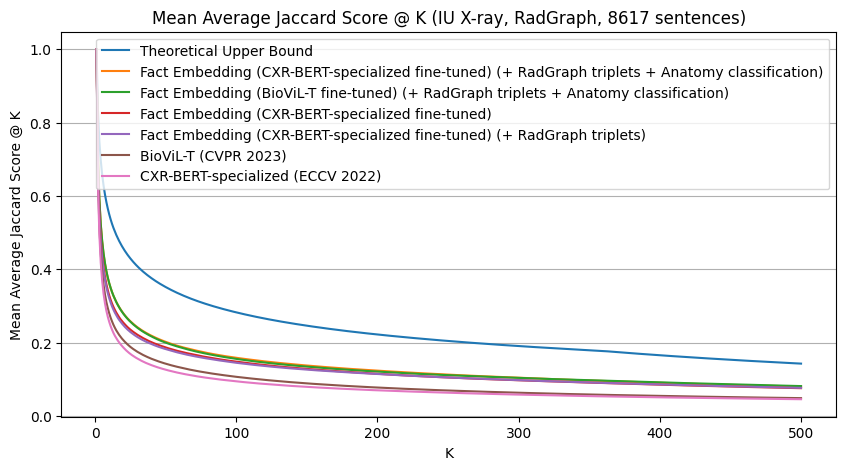

In [12]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metric_lists

metric_paths = [
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_201914_iuxray_radgraph_cxr-bert-specialized/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202054_iuxray_radgraph_biovil-t/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230815_111024_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
    '/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202920_iuxray_radgraph_oracle/mean_average_jaccard_up_to_500(iuxray_radgraph).pkl',
]
metric_lists = [load_pickle(x) for x in metric_paths]
method_names = [
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets)',
    'Fact Embedding (BioViL-T fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Theoretical Upper Bound',
]
plot_metric_lists(
    metric_lists=metric_lists,
    method_names=method_names,
    title="Mean Average Jaccard Score @ K (IU X-ray, RadGraph, 8617 sentences)",
    metric_name='Mean Average Jaccard Score @ K',
    xlabel="K",
    figsize=(10, 5),
)

In [13]:
embeddings_list_4 = [
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_201914_iuxray_radgraph_cxr-bert-specialized/embeddings(iuxray_radgraph).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202054_iuxray_radgraph_biovil-t/embeddings(iuxray_radgraph).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings(iuxray_radgraph).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/embeddings(iuxray_radgraph).pkl'),
    load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/fact_embedding/20230806_202920_iuxray_radgraph_oracle/labels.pkl'),
]
method_names_4 = [
    'CXR-BERT-specialized (ECCV 2022)',
    'BioViL-T (CVPR 2023)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned)',
    'Fact Embedding (CXR-BERT-specialized fine-tuned) (+ RadGraph triplets + Anatomy classification)',
    'Theoretical Upper Bound',
]

In [26]:
rank_sentences(embeddings_list_4, method_names_4, embeddings_list_4[-1]['labels'], metric='jaccard')

qi = 8363
-------------
CXR-BERT-specialized (ECCV 2022)
Query: Stable, mild prominence of the bilateral hilar regions, possibly consistent with enlarged pulmonary arteries/pulmonary hypertension.
**** Stable, mild prominence of the bilateral hilar regions, possibly consistent with enlarged pulmonary arteries/pulmonary hypertension.
Jaccard: 1.00
**** Enlargement of the central pulmonary arteries raising the question of pulmonary hypertension.
Jaccard: 0.19
**** Pulmonary arteries are prominent centrally.
Jaccard: 0.12
**** Prominence of the pulmonary outflow and XXXX most XXXX indicates enlarged pulmonary arteries and raise concern for pulmonary artery hypertension.
Jaccard: 0.18
**** Prominent pulmonary arteries.
Jaccard: 0.07
**** The upper lobe pulmonary vascularity appears mildly prominent consistent with pulmonary venous hypertension.
Jaccard: 0.02
**** Comparison to a previous XXXX would be most helpful alternatively a noncontrast chest CT could be performed in the nonemergent s

In [198]:
from medvqa.utils.files import load_pickle

In [199]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache.pkl')

In [221]:
# tmp['hash2labels']

In [202]:
len(tmp['label2string'])

13040

In [212]:
tmp2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/iuxray_sentences_and_radgraph_labels.pkl')

In [253]:
x = -104
print(tmp2['sentences'][x])
# print()
# print(tmp2['labels'][x])
print()
strings = []
for y in tmp2['labels'][x]:
    strings.append(tmp['label2string'][y])
for x in sorted(strings, key=lambda x:(len(x), x)):
    print(x)

This may irregular pleural-parenchymal scarring, however, recommend comparison with more remote outside imaging, if available to determine long-term stability.

scarring|OBS-U
irregular|OBS-U
